In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw10.ipynb")

# Homework 10: Linear Regression

**Helpful Resource:**

- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 

* [The Regression Line](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html)
* [Method of Least Squares](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html)
* [Least Squares Regression](https://www.inferentialthinking.com/chapters/15/4/Least_Squares_Regression.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to setup the notebook by importing some helpful libraries. Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!


**Note: This homework has hidden tests on it. That means even though the tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**


Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck.

In [2]:
# Run this cell to set up the notebook, but please don't change it.

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from datetime import datetime

## 1. Triple Jump Distances vs. Vertical Jump Heights 

Does skill in one sport imply skill in a related sport?  The answer might be different for different activities. Let's find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (a horizontal jump similar to a long jump) and the [vertical jump](https://en.wikipedia.org/wiki/Vertical_jump).  Since we're learning about linear regression, we will look specifically for a *linear* association between skill level in the two sports.

The following data was collected by observing 40 collegiate-level soccer players. Each athlete's distances in both events were measured in centimeters. Run the cell below to load the data.

In [3]:
# Run this cell to load the data
jumps = Table.read_table('triple_vertical.csv')
jumps

triple,vertical
383,33
781,71.1
561.62,62.25
624.52,61.33
446.24,40.19
515.3,38.96
449.22,39.69
560.91,46.51
519.12,37.68
595.38,53.48


**Question 1.1.** Create a function `standard_units` that converts the values in the array `data` to standard units. **(5 points)**


In [4]:
def standard_units(data):
    return (data - np.mean(data))/np.std(data)

In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** Now, using the `standard_units` function, define the function `correlation` which computes the correlation between `x` and `y`. **(5 points)**


In [6]:
def correlation(x, y):
    return np.mean(standard_units(x)*standard_units(y))

In [7]:
grader.check("q1_2")

q1_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.3.** Before running a regression, it's important to see what the data looks like, because our eyes are good at picking out unusual patterns in data.  Draw a scatter plot, **that includes the regression line**, with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis. **(5 points)**

See the documentation on `scatter` [here](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) for instructions on how to have Python draw the regression line automatically.

*Hint:* The `fit_line` argument may be useful here!


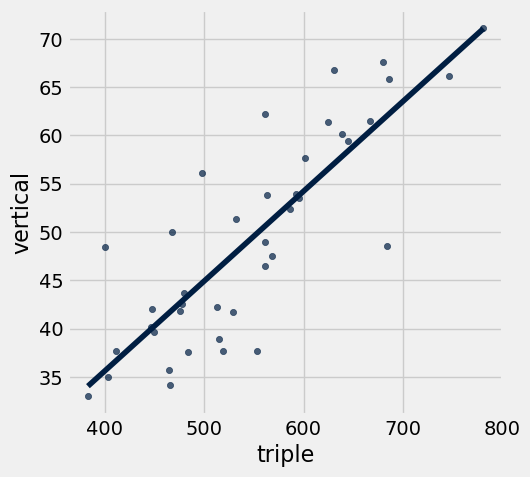

In [8]:
jumps.scatter('triple','vertical',fit_line=True)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.4.** Does the correlation coefficient $r$ look closest to 0, .5, or -.5? Explain. **(5 points)**


0.5 Because the regression line slope looks near this

<!-- END QUESTION -->

**Question 1.5.** Create a function called `parameter_estimates` that takes in the argument `tbl`, a two-column table where the first column is the x-axis and the second column is the y-axis. It should return an array with three elements: the **(1) correlation coefficient** of the two columns and the **(2) slope** and **(3) intercept** of the regression line that predicts the second column from the first, in original units. **(5 points)**

*Hint:* This is a rare occasion where it’s better to implement the function using column indices instead of column names, in order to be able to call this function on any table. If you need a reminder about how to use column indices to pull out individual columns, please refer to [this](https://www.inferentialthinking.com/chapters/06/Tables.html#accessing-the-data-in-a-column) section of the textbook.


In [9]:
def parameter_estimates(tbl):
    y_mean = np.mean(tbl.column(1))
    y_sd = np.std(tbl.column(1))
    x_mean = np.mean(tbl.column(0))
    x_sd = np.std(tbl.column(0))
    r = correlation(tbl.column(0),tbl.column(1))
    slope = r*(y_sd/x_sd)
    intercept = slope*(-x_mean)+y_mean
    return make_array(r, slope, intercept)

parameters = parameter_estimates(jumps) 
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

r: 0.8343076972837598 ; slope: 0.09295728160512184 ; intercept: -1.566520972963474


In [10]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 1.6.** Now suppose you want to go the other way and predict a triple jump distance given a vertical jump distance. What would the regression parameters of this linear model be? How do they compare to the regression parameters from the model where you were predicting vertical jump distance given a triple jump distance (in Question 1.5)? **(5 points)**

Set `regression_changes` to an array of 3 elements, with each element corresponding to whether or not the corresponding item returned by `parameter_estimates` changes when switching vertical and triple as $x$ and $y$. For example, if $r$ changes, the slope changes, but the intercept wouldn't change, the `regression_changes` would be assigned to `make_array(True, True, False)`.


In [11]:
regression_changes = make_array(False,True,True)
regression_changes

array([0, 1, 1])

In [12]:
grader.check("q1_6")

q1_6 results: All test cases passed!

**Question 1.7.** Let's use `parameters` (from Question 1.5) to predict what certain athletes' vertical jump heights would be given their triple jump distances. **(5 points)**

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What is the prediction for Edwards' vertical jump using this line?

*Hint:* Make sure to convert from meters to centimeters!


In [13]:
triple_record_vert_est = parameters.item(1)*1829+parameters.item(2)
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 168.452347 centimeters


In [14]:
grader.check("q1_7")

q1_7 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.8.** Do you think it makes sense to use this line to predict Edwards' vertical jump? **(5 points)**

*Hint:* Compare Edwards' triple jump distance to the triple jump distances in `jumps`. Is it relatively similar to the rest of the data (shown in Question 1.3)? 


_Type your answer here, replacing this text._

In [15]:
grader.check("q2_2")

q2_2 results:
    q2_2 - 1 result:
        ❌ Test case failed
        Trying:
            -1 <= r <= 1
        Expecting:
            True
        **********************************************************************
        Line 2, in q2_2 0
        Failed example:
            -1 <= r <= 1
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_2 0[0]>", line 1, in <module>
                -1 <= r <= 1
            NameError: name 'r' is not defined

    q2_2 - 2 result:
        ✅ Test case passed

In [16]:
grader.check("q2_3")

q2_3 results:
    q2_3 - 1 result:
        ❌ Test case failed
        Trying:
            0 < eth_predictor(10) < 100
        Expecting:
            True
        **********************************************************************
        Line 1, in q2_3 0
        Failed example:
            0 < eth_predictor(10) < 100
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_3 0[0]>", line 1, in <module>
                0 < eth_predictor(10) < 100
            NameError: name 'eth_predictor' is not defined

<!-- END QUESTION -->

## 2. Relative Sea Level Rise

#### Global Mean Sea Level

Humans are altering Earth's climate by increasing the amount of heat-trapping greenhouse gases in the atmosphere. Atmospheric carbon dioxide (the most commonly emitted greenhouse gas) has reached 400 parts per million, a level unseen on earth in the last 800,000 years. Most of the additional heat that is being trapped is being absorbed by the oceans. As the water warms up, it expands, takes up more space, and causes sea levels to rise. Additionally, melting land ice (especially on Greenland and Antarctica) is adding mass to the ocean, further raising **global mean sea level**(GMSL).


<!-- BEGIN QUESTION -->

**Question 2.1.** Based on the description above, what are the two main ways that climate change increases global mean sea level?

_Type your answer here, replacing this text._

<!-- END QUESTION -->
#### Relative Sea Level

Each coastal location will experience sea level rise differently due to local and regional factors. One of these factors is the rising or sinking of land due to plate tectonics, called **vertical land motion** (VLM). If the land is sinking at a coastal location AND the ocean in the region is rising, then the locals might be very worried. If instead the land is rising faster than the ocean is rising, then the locals might feel as if the ocean is receeding. We can account for this effect by using **relative sea level** (RSL), where we observe water levels relative to a land based reference frame. 

#### Relative Sea Level in Northern California

Let's take a look at relative sea level data from two different tide gauge locations along our coast to see how this plays out...

In [17]:
stations = Table.read_table("NorCalSLRmeta.csv")

Marker.map_table(stations.select('lat', 'lon', 'station_name').relabel('station_name', 'labels'))

Zoom out on the map until you see both blue markers. Click on each marker to see the labels for the tide gauge stations. 

<!-- BEGIN QUESTION -->

**Question 2.2.** What is the name of the tide gauge station that is closest to Cal Poly Humboldt?

_Type the name of the station here, replacing this text._

<!-- END QUESTION -->

Now let's look at the data from these stations. The data is in meters and is an average of the water levels for each month. Additionally, regular seasonal fluctuations have been removed.

In [18]:
rsl = Table.read_table("NorCalSLR.csv")
rsl

months since December 1979,North Spit,Crescent City
0,-0.0730833,-0.01175
1,-0.06925,-0.00691667
2,-0.0624167,0.00316667
3,-0.0664167,0.00216667
4,-0.0689167,0.00291667
5,-0.0679167,0.0065
6,-0.0635833,0.0130833
7,-0.0633333,0.0169167
8,-0.0605,0.0191667
9,-0.06075,0.0191667


Here is a plot of both stations:

Text(0, 0.5, 'RSL [meters]')

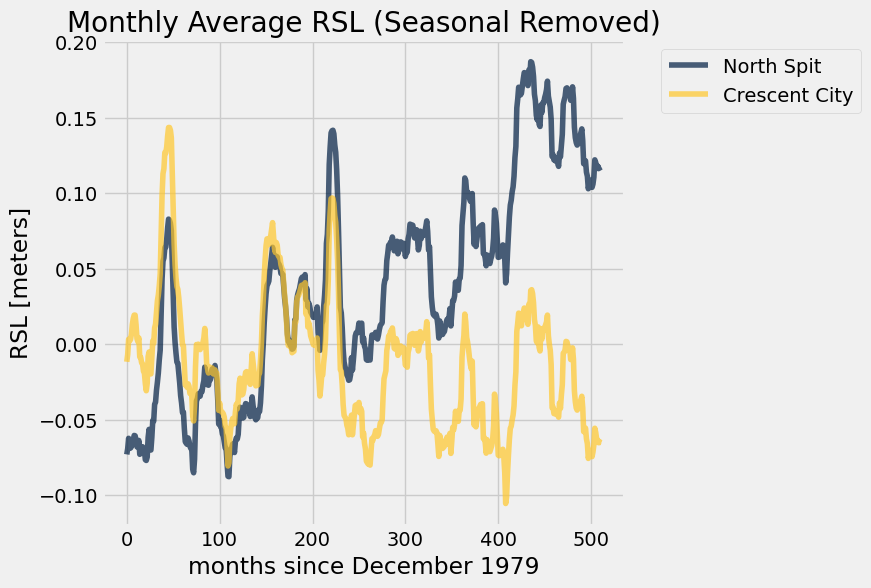

In [19]:
rsl.plot("months since December 1979",["North Spit", "Crescent City"])
plt.title('Monthly Average RSL (Seasonal Removed)')
plt.ylabel('RSL [meters]')

Let's take a closer look at each of these stations, one by one.

## 3. Sea Level Rise at North Spit

<!-- BEGIN QUESTION -->
**Question 3.1.** Use the function `parameter_estimates` that you defined earlier to compute the least-squares linear regression line that predicts relative sea level (RSL) at *North Spit* based on the month, in original units. We have provided a two column table for you in the cell below with the first column representing the months (x) and the second column representing observed RSL at North Spit (y), which you should use as an argument to the function. **(5 points)**


In [20]:
rsl_ns_tbl = rsl.select('months since December 1979', 'North Spit').relabeled('North Spit','Observed')
estimates = parameter_estimates(rsl_ns_tbl)
rsl_ns_slope = estimates.item(1)
rsl_ns_intercept = estimates.item(2)
print("Slope:", round(rsl_ns_slope, 5))
print("Intercept", round(rsl_ns_intercept, 5))

Slope: 0.00039
Intercept -0.06138


Convert the slope for North Spit from *meters per month* **to** *millimeters per year* (which are the units typically used to document sea level rise)

In [21]:
rsl_ns_slope_mm_per_year = rsl_ns_slope*1000*12
rsl_ns_slope_mm_per_year

4.727691405279573

This number is the *relative sea level **rise*** estimate for *North Spit*. Wigi, as named by the Wiyot people, is also known as Humboldt Bay. As you can see from the map we made above, the North Spit tide gauge is located in Wigi. **Wigi is experiencing one of the fastest rates of relative sea level rise on the West Coast!** This is mostly due to the sinking (subsidence) of the tectonic plate here!

**Question 3.2** Write a function `linear_model` which has three inputs: a dependent variable array (x), slope value, and intercept value. It should output an array of independent values (y) for each dependent value.

In [22]:
def linear_model(x,slope,intercept):
    return slope*x+intercept

Write a function `linear_fit` which takes the table that consists of an independent variable and a dependent variable as input (for example your rsl_ns_tbl should work). The function should use the first column of the table to predict the second column of the table using the linear regression model. It should output a prediction that is an array of numbers associated with each month. Again, it will be helpful to use the functions `parameter_estimates` and `linear_model` that you defined earlier in this homework. (5 points)

Note: Make sure that your `linear_fit` function is using least squares linear regression.

In [23]:
def linear_fit(tbl):
    parameters = parameter_estimates(tbl)
    slope = parameters.item(1)
    intercept = parameters.item(2)
    return linear_model(tbl.column(0),slope,intercept)

Now, using the `linear_fit` function you just defined, make a plot with "months since December 1979" along the x-axis and both real and modeled relative sea level along the y-axis. The color of the lines for the real sea level should be different from the color for the predicted sea level. Make sure to label your axes and note your units. (5 points)

*Hint 1*: An example of a line plot can be found above.

*Hint 2*: Think about the table that must be used to generate this line plot. What data should the columns represent? Based on the data that you need, how many columns should be present in this table? Also, what should each row represent? Constructing the table will be the main part of this question; once you have this table, generating the line plot should be more straightforward.

Text(0, 0.5, 'RSL [meters]')

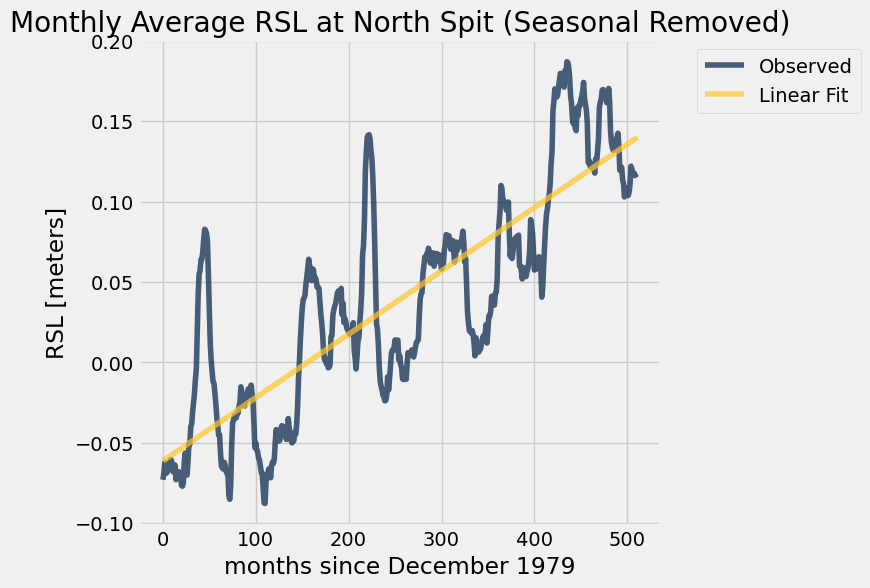

In [24]:
rsl_ns_tbl = rsl_ns_tbl.with_column("Linear Fit", linear_fit(rsl_ns_tbl))
rsl_ns_tbl.plot('months since December 1979',["Observed","Linear Fit"])
plt.title('Monthly Average RSL at North Spit (Seasonal Removed)')
plt.ylabel('RSL [meters]')

Add another column to `rsl_ns_tbl` called "Fit Residual" with values of the sea level Observations minus the Linear Fit prdictions at North Spit. We will look at this residual in a later section of the activity.

In [25]:
rsl_ns_tbl = rsl_ns_tbl.with_column('Fit Residual',rsl_ns_tbl.column("Observed")-rsl_ns_tbl.column("Linear Fit"))
rsl_ns_tbl

months since December 1979,Observed,Linear Fit,Fit Residual
0,-0.0730833,-0.0613806,-0.0117027
1,-0.06925,-0.0609867,-0.00826333
2,-0.0624167,-0.0605927,-0.00182397
3,-0.0664167,-0.0601987,-0.00621795
4,-0.0689167,-0.0598047,-0.00911192
5,-0.0679167,-0.0594108,-0.00850589
6,-0.0635833,-0.0590168,-0.00456653
7,-0.0633333,-0.0586228,-0.00471051
8,-0.0605,-0.0582289,-0.00227115
9,-0.06075,-0.0578349,-0.00291512


**Question 3.3** Next create another function called `linear_predictor` that can predict values outside of the domain of the observations. (For example, what if we wanted to know what the sea levels will be in 2100?) This function will be very similar to the `linear_fit` function you just created but the input and output will change. You will still need to input a table consisting of independent and dependent values, but you will need one additional input representing the new independed value where you want a prediction. There will still be one output but it will provide linearly predicted values for the new indepedent value that was input. 

In [26]:
def linear_predictor(tbl,x):
    parameters = parameter_estimates(tbl)
    slope = parameters.item(1)
    intercept = parameters.item(2)
    return linear_model(x,slope,intercept)

Now use your `linear_predictor` function to estimate relative sea level at North Spit in meters for the year 2100 (which is 1453 months after December 1979.)

In [27]:
linear_predictor(rsl_ns_tbl,1453)

0.5110639898986021

Here are some official estimates of how sea level is projected to change in the future at *North Spit*, where each color represents a different green house gas emissions scenario. *Note that sea level is shown in meters on the right*

<img src="NorthSpitSLRprojection.jpg" alt="drawing" width="1000"/>

You can find more info on these projections [here](https://oceanservice.noaa.gov/hazards/sealevelrise/sealevelrise-tech-report-sections.html).

Based on your estimate for 2100 and also the shape of these prediction curves, do you think your linear model is reasonable for North Spit? Why or why not?

_Type your answer here, replacing this text_

## 4. Sea Level Rise at Crescent City

Now let's do something similar for *Crescent City*. First let's make a new table that just has the Crescent City data alongside each month.

In [28]:
rsl_cc_tbl = rsl.select('months since December 1979', 'Crescent City').relabeled('Crescent City','Observed')
rsl_cc_tbl

months since December 1979,Observed
0,-0.01175
1,-0.00691667
2,0.00316667
3,0.00216667
4,0.00291667
5,0.0065
6,0.0130833
7,0.0169167
8,0.0191667
9,0.0191667


Again we will use linear regression to estimate sea level rise here. However, this time we will program our linear regression a slightly different way. Recall that the least-squares regression line is the unique straight line that minimizes root mean squared error (RMSE) among all possible fit lines. Using this property, we can find the equation of the regression line by finding the pair of slope and intercept values that minimize root mean squared error. 

<!-- BEGIN QUESTION -->
**Question 4.1** Define a function called `errors`.  It should take three arguments:
1. a table `tbl` like `rsl_cc_tbl` (with the same column names and meanings, but not necessarily the same data)
2. the `slope` of a line (a number)
3. the `intercept` of a line (a number).

It should **return an array of the errors** made when a line with that slope and intercept is used to predict sea level for each month in the given table. **(3 points)**

*Note*: Make sure you are returning an array of the errors, and not the RMSE. 

In [29]:
def errors(tbl, slope, intercept):
    predictions = slope*tbl.column(0)+intercept
    return tbl.column(1)-predictions

First let's look at a linear model with an arbitrarly guess for the slope of `-0.0002` and intercept `0.01` on the *Crescent City* dataset. Add a column to your `rsl_cc_tbl` called "Linear Guess" with this linear model's predictions of sea levels at Crescent City. Then make a plot with the months on the x axis and both the "Observed" and "Linear Guess" values on the y axis. Make sure to label your axes and note your units.

Text(0, 0.5, 'RSL [meters]')

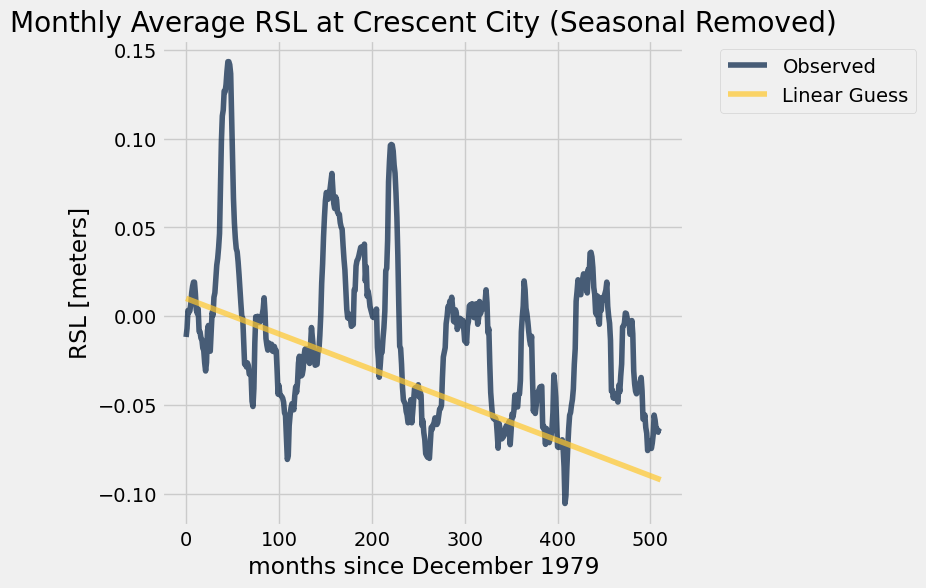

In [31]:
slope_guess = -0.0002
intercept_guess = 0.01
rsl_cc_tbl = rsl_cc_tbl.with_column('Linear Guess',linear_model(rsl_cc_tbl.column(0),slope_guess,intercept_guess))
rsl_cc_tbl.plot('months since December 1979',['Observed', 'Linear Guess'])
plt.title('Monthly Average RSL at Crescent City (Seasonal Removed)')
plt.ylabel('RSL [meters]')

Now add a column called "Guess Residual" to your table for the error of the model using your function `errors`. Then make a plot with the months on the x axis and the errors on the y axis.

Text(0.5, 1.0, 'Residual of Linear Model with Guess Parameters')

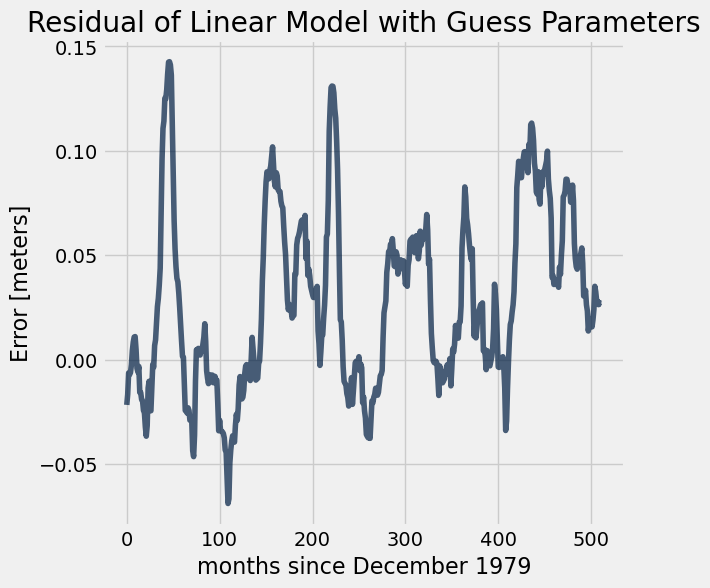

In [32]:
rsl_cc_tbl = rsl_cc_tbl.with_column('Guess Residual',errors(rsl_cc_tbl,slope_guess,intercept_guess))
rsl_cc_tbl.plot('months since December 1979','Guess Residual')
plt.ylabel('Error [meters]')
plt.title('Residual of Linear Model with Guess Parameters')

Note that the residual is almost always positive, which means our linear model is not a very good fit to the data. (We want the residuals to be positive as often as they are negative.)

**Question 4.2.** Define a **NEW** function called `fit_line`.  It should take a table like `rsl_cc_tbl` (with the same column names and meanings) as its argument.  It should return an array containing the slope (as the first element) and intercept (as the second element) of the least-squares regression line predicting sea levels from the month for that table. **(3 points)**

*Hint*: Define a function `rmse` within `fit_line` that takes a slope and intercept as its arguments. `rmse` will use the table passed into `fit_line` to compute predicted outcomes and then return the root mean squared error between the predicted and actual outcomes. Within `fit_line`, you can call `rmse` the way you would any other function.

If you haven't tried to use the `minimize` [function](http://data8.org/sp22/python-reference.html) yet, now is a great time to practice. Here's an [example from the textbook](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#numerical-optimization).

In [33]:
def fit_line(tbl):
    # Your code may need more than 1 line below here.
    def rmse(slope, intercept):
        return (np.mean(errors(tbl,slope,intercept)**2)**0.5) 
    return minimize(rmse)
    
# Here is an example call with made up data to test your function. To check your function,
# figure out the right slope and intercept for this example by hand.
example_table = Table().with_columns(
    "months since December 1979", make_array(0, 1),
    "Crescent City", make_array(1, 3))
fit_line(example_table)

array([ 2.,  1.])

Use `fit_line` to fit a line to the sea levels at Crescent City, and assign the output to `best_line`. Assign the first and second elements in `best_line` to `best_line_slope` and `best_line_intercept`, respectively.

The code provided will add the best line fit to your `rsl_cc_tbl` and plot your best line that minimizes RMSE on top of the Crescent City sea level time series. It will also print the values for the slope and intercept.

'Slope: -0.00011463 | Intercept: 0.0165258'

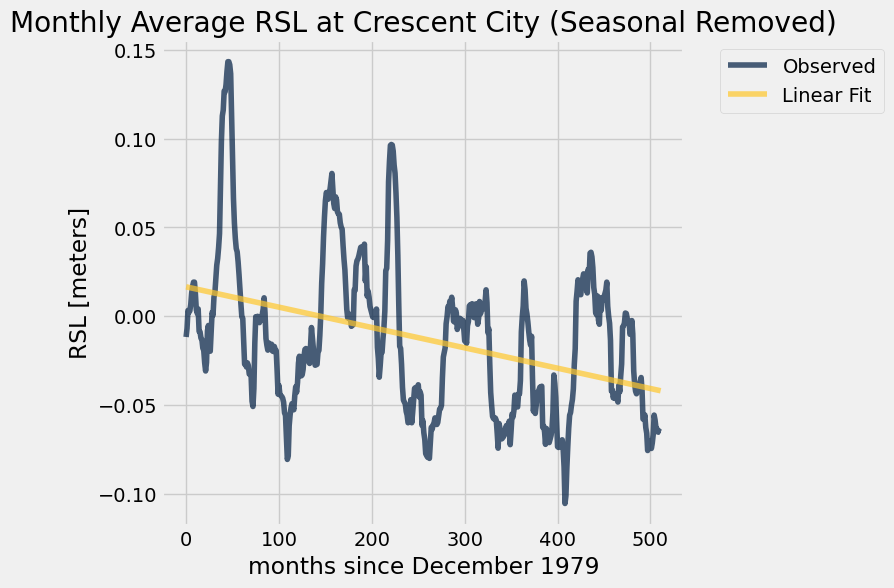

In [34]:
best_line = fit_line(rsl_cc_tbl)
slope_best = best_line.item(0)
intercept_best = best_line.item(1)

rsl_cc_tbl = rsl_cc_tbl.with_column('Linear Fit',linear_model(rsl_cc_tbl.column(0),slope_best,intercept_best))
rsl_cc_tbl.plot('months since December 1979',['Observed', 'Linear Fit'])
plt.title('Monthly Average RSL at Crescent City (Seasonal Removed)')
plt.ylabel('RSL [meters]')

# This just prints your slope and intercept
"Slope: {:g} | Intercept: {:g}".format(slope_best, intercept_best)

Let's' see how our `slope_best` and `intercept_best` values compare to the values we get from our `parameter estimate` function...

In [35]:
parameters = parameter_estimates(rsl_cc_tbl)
slope = parameters.item(1)
print("Slope Parameter Estimate: {:g} | Slope RMSE Minimized: {:g}".format(slope, slope_best))
intercept = parameters.item(2)
print("Intercept Parameter Estimate: {:g} | Intercept RMSE Minimized: {:g}".format(intercept, intercept_best))

Slope Parameter Estimate: -0.00011463 | Slope RMSE Minimized: -0.00011463
Intercept Parameter Estimate: 0.0165258 | Intercept RMSE Minimized: 0.0165258


Did you expect that the two slope estimates would be similar? Did you expect that the two intercept estimates would be similar? Why or why not?

_Type your answer here, replacing this text._

**Question 4.3.** Convert the slope for North Spit from meters per month to millimeters per year (which are the units typically used to document sea level rise)

In [36]:
rsl_cc_slope_mm_per_year = slope_best*1000*12
rsl_cc_slope_mm_per_year

-1.3755640392436796

This number is the *relative sea level **rise*** estimate for *Crescent City*. Note that this number is **NEGATIVE** which means that sea level is going down! This is mostly due to the rising of the tectonic plate here!

Now use the `linear_predictor` function that you created earlier to estimate relative sea level at *Crescent City* in meters for the year 2100 (which is 1453 months after December 1979.)

In [37]:
linear_predictor(rsl_cc_tbl,1453)

-0.15003204257864186

Here are some official estimates of how sea level is projected to change in the future at *North Spit*, where each color represents a different green house gas emissions scenario. *Note that sea level is shown in meters on the right*

<img src="CrescentCitySLRprojection.jpg" alt="drawing" width="1000"/>

You can find more info on these projections [here](https://oceanservice.noaa.gov/hazards/sealevelrise/sealevelrise-tech-report-sections.html).

Based on your estimate for 2100 and also the shape of these prediction curves, do you think your linear model is reasonable for Crescent City? Why or why not?

_Type your answer here, replacing this text_

Next, add a new column to `rsl_cc_tbl` called "Fit Residual" which contains the errors that we get by calling `errors` with our best fit line. We will use this data in the next section.

In [38]:
rsl_cc_tbl = rsl_cc_tbl.with_column("Fit Residual",errors(rsl_cc_tbl,slope_best,intercept_best))

## 5. Detrended Sea Level Variability

Now we understand the reason why sea levels at North Spit and Crescent City look different: it is primarily because the tectonic plate is rising at Crescent City and sinking at North Spit. Here we plot the two time series on top of each other again, so we can remember what they look like compared to each other. 

Text(0, 0.5, 'RSL [meters]')

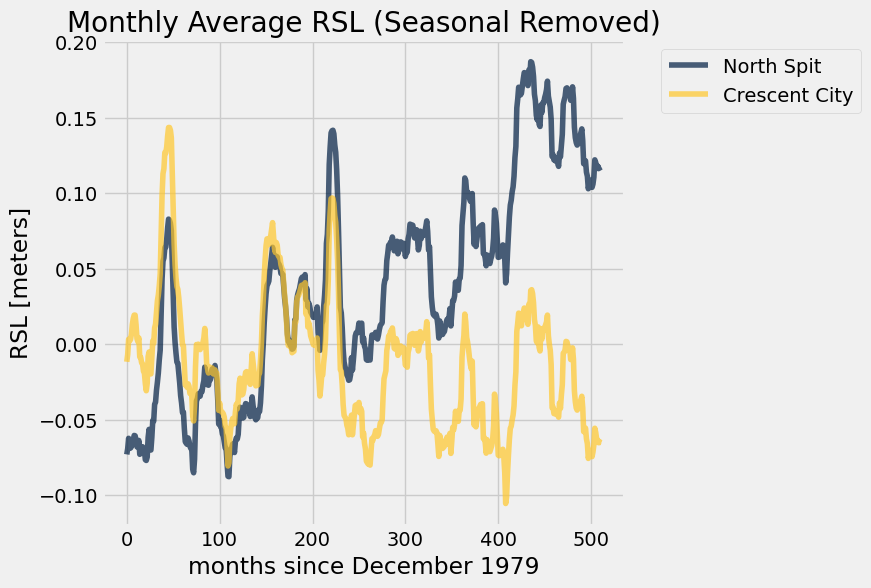

In [39]:
rsl.plot("months since December 1979",["North Spit", "Crescent City"])
plt.title('Monthly Average RSL (Seasonal Removed)')
plt.ylabel('RSL [meters]')

<!-- BEGIN QUESTION -->
**Question 5.1.** Compute the correlation coefficient between the North Spit and Crescent City station time series. **(5 points)**

*Note:* It might be helpful to use the `correlation` function you created earlier.

In [40]:
r = correlation(rsl.column("North Spit"),rsl.column("Crescent City"))
r

0.18975899998212875

<!-- END QUESTION -->
You are likey finding a pretty low value for the correlation coeeficient considering the ocean behaves quite similarly over the distances that these stations are separated. This is because tectonic activity is dominating the trends in each time series. Let's take a look at the data with the trend removed. 

**Quetion 5.2** Go ahead and make a new table called `detrended_rsl` which has the columns "months since Decemember 1979", and the fit residuals from "North Spit" and "Crescent City". Then make a plot with the months on the x axis and the residuals on the y axis, showing the residuals for *both* North Spit and Crescent City on one plot. 

Text(0.5, 1.0, 'Residual of Best Fit Linear Model')

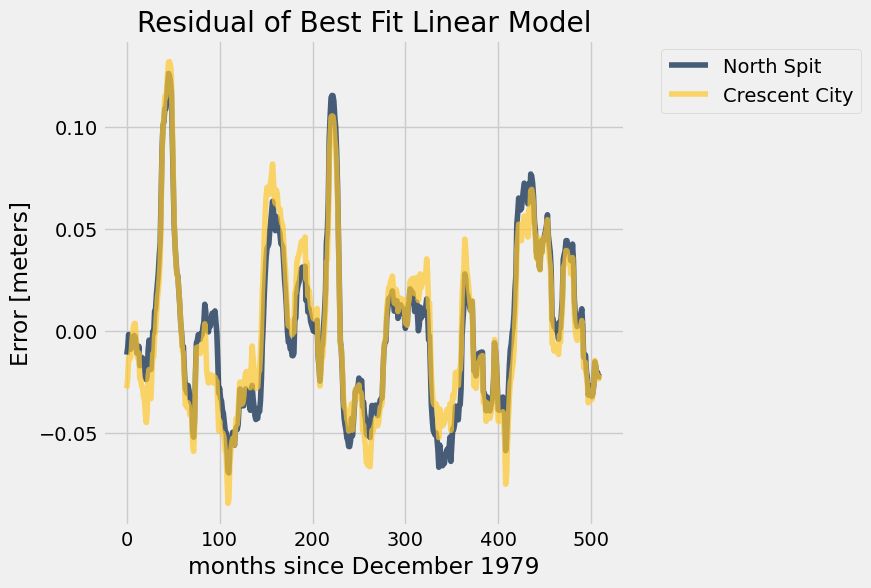

In [41]:
detrended_rsl = rsl_ns_tbl.select('months since December 1979','Fit Residual')
detrended_rsl = detrended_rsl.relabeled('Fit Residual', 'North Spit')
detrended_rsl = detrended_rsl.with_column('Crescent City',rsl_cc_tbl.column('Fit Residual'))
detrended_rsl.plot('months since December 1979',['North Spit', 'Crescent City'])
plt.ylabel('Error [meters]')
plt.title('Residual of Best Fit Linear Model')

Now calculate the correlation of these detrended time series with each other.

In [42]:
r = correlation(detrended_rsl.column("North Spit"),rsl.column("Crescent City"))
r

0.88744909446127496

Now we are able to see that these two locations also have a lot in common in tems of sea level residuals. The two peaks in the residual times series are at around months 50 and 220, which correspond to the winters of 1982-83 and 1997-98. What is your hypthosis for why sea levels were elevated so far above the trend during those times? 

*Hint:* Download and read [this page](https://humboldt.cloudbank.2i2c.cloud/hub/user-redirect/git-sync?repo=https://github.com/bludka/materials-sp22&urlpath=tree/materials-sp22/hw/hw10/RisingSeasInCaliforniaBox1.pdf) from the California Ocean Protection Council's "Rising Seas in California" report to answer this question. 

_Type your answer here, replacing this text_

In [ ]:
grader.check("q3_1")

In [ ]:
grader.check("q3_2")

In [ ]:
grader.check("q3_3")

In [ ]:
grader.check("q3_5")

In [ ]:
grader.check("q3_6")

In [ ]:
grader.check("q3_7")

In [ ]:
grader.check("q3_8")

<!-- END QUESTION -->

You're done with Homework 10!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Then submit the zip file to the corresponding assignment according to your instructor's directions. 

**It is your responsibility to make sure your work is saved before running the last cell.**

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)